In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.layers import Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
import h5py
from keras.preprocessing.image import ImageDataGenerator
%matplotlib inline

Using TensorFlow backend.


In [3]:
np.random.seed(0)

In [4]:
train_path='plant_images/train'
valid_path='plant_images/valid'
test_path='plant_images/test'
class_list=['SpeciesA','SpeciesB','SpeciesC']

In [5]:
train_batches=ImageDataGenerator(rescale=1./255).flow_from_directory(train_path,target_size=(224,224),class_mode='categorical',batch_size=20)
test_batches=ImageDataGenerator(rescale=1./255).flow_from_directory(test_path,target_size=(224,224),class_mode='categorical',batch_size=4)
valid_batches=ImageDataGenerator(rescale=1./255).flow_from_directory(valid_path,target_size=(224,224),class_mode='categorical',batch_size=6)


Found 422 images belonging to 3 classes.
Found 62 images belonging to 3 classes.
Found 197 images belonging to 3 classes.


In [6]:
def plots(ims,figsize=(10,6),rows=1,interp=False,titles=None):
    if type(ims[0]) is np.ndarray:
        ins=np.array(ims).astype(np.uint8)
        if (ims.shape[-1] !=3):
            ims=ims.transpose((0,2,3,1))
    f=plt.figure(figsize=figsize)
    cols=len(ims)//rows if len(ims)%2 ==0 else len(ims)//rows
    for i in range(len(ims)):
        sp=f.add_subplot(rows,cols,i+1)
        sp.axis('off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=10)
        plt.imshow(ims[i],interpolation=None)

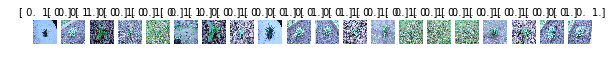

In [7]:
imgs,labels=next(train_batches)
plots(imgs,titles=labels)

In [10]:
model=Sequential()
model.add(Conv2D(filters=64,kernel_size=3, input_shape=(224,224,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(.2))

model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(.2))

model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(.2))

model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(.1))

model.add(Conv2D(filters=1024,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(.1))

#model.add(GlobalAveragePooling2D())
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(.2))
model.add(Dense(32,activation='relu'))
model.add(Dropout(.2))
model.add(Dense(64,activation='relu'))
model.add(Dropout(.1))
model.add(Dense(3,activation='softmax'))
model.summary()

model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 222, 222, 64)      1792      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 111, 111, 64)      0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 111, 111, 64)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 109, 109, 512)     295424    
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 54, 54, 512)       0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 54, 54, 512)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 52, 52, 128)       589952    
__________

In [11]:
history=model.fit_generator(train_batches,steps_per_epoch=4, nb_epoch=20,validation_data=valid_batches,validation_steps=2, verbose=2)

Instructions for updating:
Use tf.cast instead.


/home/abir/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  """Entry point for launching an IPython kernel.
/home/abir/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., steps_per_epoch=4, validation_data=<keras_pre..., validation_steps=2, verbose=2, epochs=20)`
  """Entry point for launching an IPython kernel.


Epoch 1/20
 - 61s - loss: 3.5469 - acc: 0.2875 - val_loss: 1.1079 - val_acc: 0.3333
Epoch 2/20
 - 41s - loss: 1.1011 - acc: 0.3625 - val_loss: 1.0966 - val_acc: 0.3333
Epoch 3/20
 - 41s - loss: 1.0939 - acc: 0.3500 - val_loss: 1.1088 - val_acc: 0.4167
Epoch 4/20
 - 43s - loss: 1.0916 - acc: 0.4375 - val_loss: 1.0992 - val_acc: 0.2500
Epoch 5/20
 - 37s - loss: 1.0907 - acc: 0.3625 - val_loss: 1.0700 - val_acc: 0.5833
Epoch 6/20
 - 32s - loss: 1.0757 - acc: 0.4735 - val_loss: 1.0926 - val_acc: 0.3333
Epoch 7/20
 - 37s - loss: 1.1024 - acc: 0.3000 - val_loss: 1.0986 - val_acc: 0.3333
Epoch 8/20
 - 35s - loss: 1.0191 - acc: 0.4750 - val_loss: 1.1121 - val_acc: 0.3333
Epoch 9/20
 - 38s - loss: 1.1183 - acc: 0.3625 - val_loss: 1.0912 - val_acc: 0.4167
Epoch 10/20
 - 37s - loss: 1.0908 - acc: 0.3625 - val_loss: 1.0998 - val_acc: 0.4167
Epoch 11/20
 - 32s - loss: 1.0925 - acc: 0.5265 - val_loss: 1.0942 - val_acc: 0.3333
Epoch 12/20
 - 37s - loss: 1.0959 - acc: 0.3750 - val_loss: 1.0990 - val_a

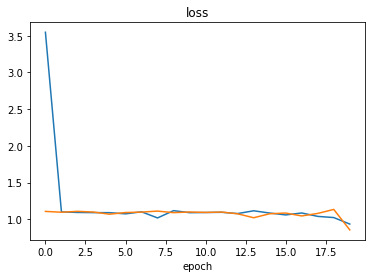

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.xlabel('epoch')

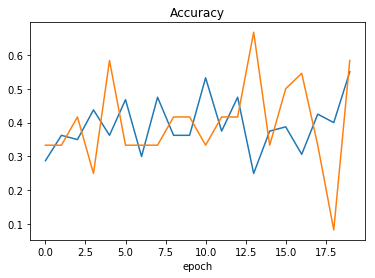

In [14]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Accuracy')
plt.xlabel('epoch')

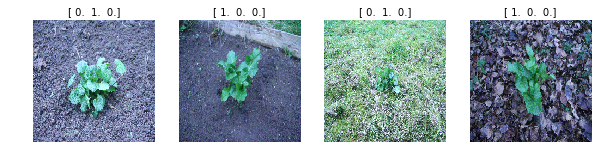

In [19]:
test_imgs,test_labels=next(test_batches)
plots(test_imgs,titles=test_labels)

In [28]:
pred=model.predict_generator(test_batches,steps=1)

In [29]:
pred

array([[ 0.34508684,  0.3381182 ,  0.31679496],
       [ 0.05546753,  0.72458714,  0.21994528],
       [ 0.06907156,  0.69304204,  0.23788637],
       [ 0.08863062,  0.65666687,  0.25470251]], dtype=float32)

TypeError: 'tuple' object is not callable

In [ ]:
cm